In [3]:
liste = [1, 2.0, "trois", "QUATRE", 5, 6.0]

print(liste)
print(liste[2])

[1, 2.0, 'trois', 'QUATRE', 5, 6.0]
trois


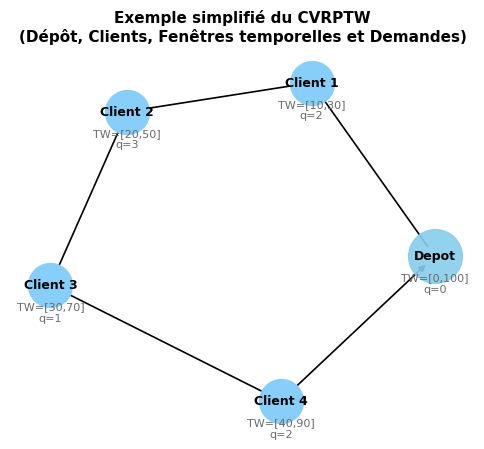

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# =============================
# 🔷 Exemple simplifié du CVRPTW
# =============================

G = nx.DiGraph()

# --- Sommets (dépôt + clients)
nodes = {
    "Depot": {"TW": "[0,100]", "q": 0},
    "Client 1": {"TW": "[10,30]", "q": 2},
    "Client 2": {"TW": "[20,50]", "q": 3},
    "Client 3": {"TW": "[30,70]", "q": 1},
    "Client 4": {"TW": "[40,90]", "q": 2},
}
G.add_nodes_from(nodes)

# --- Arêtes orientées (routes possibles)
edges = [
    ("Depot", "Client 1"), ("Client 1", "Client 2"),
    ("Client 2", "Client 3"), ("Client 3", "Client 4"),
    ("Client 4", "Depot")
]
G.add_edges_from(edges)

# --- Positionnement pour une belle visualisation
pos = {
    "Depot": (2, 0),
    "Client 1": (1.2, 1.2),
    "Client 2": (0, 1),
    "Client 3": (-0.5, -0.2),
    "Client 4": (1, -1)
}

# --- Dessin du graphe
plt.figure(figsize=(6,5))
nx.draw_networkx_edges(G, pos, edge_color="black", arrows=True, arrowstyle='-|>', width=1.2)
nx.draw_networkx_nodes(G, pos, nodelist=["Depot"], node_color="skyblue", node_size=1500, alpha=0.9)
nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if n!="Depot"], node_color="lightskyblue", node_size=1000)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight="bold")

# --- Ajout des labels TW et q_i sous chaque noeud
for node, (x, y) in pos.items():
    info = nodes[node]
    label = f"TW={info['TW']}\nq={info['q']}"
    plt.text(x, y-0.25, label, fontsize=8, ha='center', color='dimgray')

plt.title("Exemple simplifié du CVRPTW\n(Dépôt, Clients, Fenêtres temporelles et Demandes)", fontsize=11, weight='bold')
plt.axis('off')
plt.show()


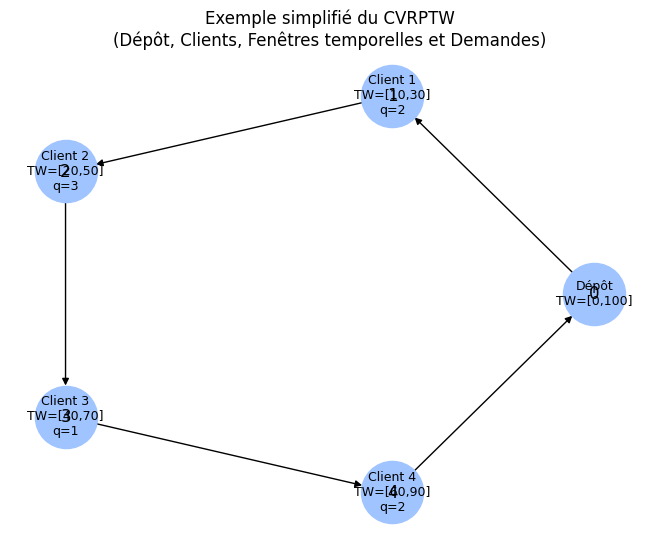

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Création du graphe CVRPTW simplifié ---
G = nx.DiGraph()

# Dépôt + clients
nodes = {
    0: {"label": "Dépôt\nTW=[0,100]"},
    1: {"label": "Client 1\nTW=[10,30]\nq=2"},
    2: {"label": "Client 2\nTW=[20,50]\nq=3"},
    3: {"label": "Client 3\nTW=[40,70]\nq=1"},
    4: {"label": "Client 4\nTW=[60,90]\nq=2"}
}

# Arêtes (trajets possibles)
edges = [(0,1),(1,2),(2,3),(3,4),(4,0)]

G.add_edges_from(edges)

# Position circulaire
pos = nx.circular_layout(G)

# Dessin des arêtes et sommets
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="#a0c4ff", arrows=True)
labels = {i: data["label"] for i,data in nodes.items()}
nx.draw_networkx_labels(G, pos, labels, font_size=9)

# Mise en forme
plt.title("Exemple simplifié du CVRPTW\n(Dépôt, Clients, Fenêtres temporelles et Demandes)", fontsize=12)
plt.axis("off")
plt.show()


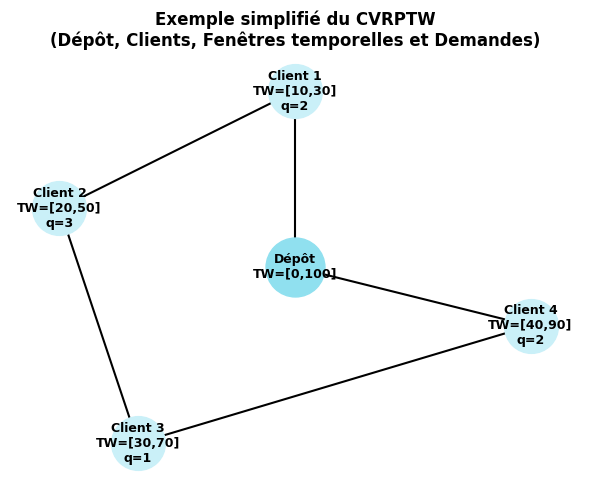

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Création du graphe CVRPTW simplifié ---
G = nx.DiGraph()

# Sommets : dépôt + clients
nodes = {
    0: {"label": "Dépôt\nTW=[0,100]"},
    1: {"label": "Client 1\nTW=[10,30]\nq=2"},
    2: {"label": "Client 2\nTW=[20,50]\nq=3"},
    3: {"label": "Client 3\nTW=[30,70]\nq=1"},
    4: {"label": "Client 4\nTW=[40,90]\nq=2"}
}

# Arêtes (trajets possibles)
edges = [(0,1),(1,2),(2,3),(3,4),(4,0)]
G.add_edges_from(edges)

# --- Positions manuelles pour un rendu plus clair ---
pos = {
    0: (0, 0),       # dépôt au centre
    1: (0, 1.5),
    2: (-1.5, 0.5),
    3: (-1, -1.5),
    4: (1.5, -0.5)
}

# --- Dessin ---
plt.figure(figsize=(6,5))
nx.draw_networkx_edges(G, pos, edge_color="black", arrows=True, width=1.5, arrowstyle="->")
nx.draw_networkx_nodes(G, pos, nodelist=[0], node_color="#90e0ef", node_size=1800, label="Dépôt")
nx.draw_networkx_nodes(G, pos, nodelist=[1,2,3,4], node_color="#caf0f8", node_size=1500, label="Clients")

# Labels
labels = {i: data["label"] for i, data in nodes.items()}
nx.draw_networkx_labels(G, pos, labels, font_size=9, font_weight='bold')

# --- Mise en forme ---
plt.title("Exemple simplifié du CVRPTW\n(Dépôt, Clients, Fenêtres temporelles et Demandes)", fontsize=12, fontweight="bold")
plt.axis("off")
plt.tight_layout()
plt.show()


"----\n",
    "## IV. Modélisation du problème \n",
    "\n",
    "### 1. Définir les composantes de base du problème\n",
    "\n",
    "**Graphe et Notations**\n",
    "- **Graphe $ G = (V, E) $** : Où $V$ est l'ensemble des nœuds (clients et dépôt) et $E$ l'ensemble des arêtes représentant les routes possibles entre les nœuds.\n",
    "\n",
    "- **Nœuds $ V = \\{0, 1, ..., n\\} $** : Où $0$ est le dépôt et $\\{0, 1, ..., n\\}$ sont les clients.\n",
    "\n",
    "- **Arêtes $ E = \\{(i, j) \\mid i, j \\in V, i \\neq j \\} $**.\n",
    "\n",
    "**Paramètres**\n",
    "- **$ d_{ij}(t) $** : Distance entre le nœud $i$ et le nœud $j$.\n",
    "\n",
    "### 2. Variables de décision\n",
    "\n",
    "- $ x_{ij} $ : Variable binaire égale à 1 si la route entre $i$ et $j$ est empruntée, 0 sinon.\n",
    "-  $u_i$  : Variable auxiliaire pour éliminer les sous-tours.\n",
    "\n",
    "### 3. Fonction objectif\n",
    "\n",
    "Minimiser la distance totale parcourue par le voyageur :\n",
    "\n",
    "$$\n",
    "\\text{Min} \\sum_{i \\in V} \\sum_{j \\in V} d_{ij} x_{ij} (t)\n",
    "$$\n",
    "\n",
    "### 4. Contraintes\n",
    "\n",
    "**Contraintes de parcours**\n",
    "\n",
    "1. Chaque nœud est visité exactement une fois :\n",
    "$$\n",
    "\\sum_{j \\in V, j \\neq i} x_{ij} = 1, \\quad \\forall i \\in V\n",
    "$$\n",
    "\n",
    "2. Chaque nœud est quitté exactement une fois :\n",
    "$$\n",
    "\\sum_{i \\in V, i \\neq j} x_{ij} = 1, \\quad \\forall j \\in V\n",
    "$$\n",
    "\n",
    "**Contraintes pour éliminer les sous-tours (Contraintes de Miller-Tucker-Zemlin)**\n",
    "\n",
    "3. Élimination des sous-tours :\n",
    "$$\n",
    "u_i - u_j + n \\cdot x_{ij} \\leq n - 1, \\quad \\forall i, j \\in V, i \\neq j, i \\neq 0, j \\neq 0\n",
    "$$\n",
    "\n",
    "4. Valeurs de $ u_i $ :\n",
    "$$\n",
    "1 \\leq u_i \\leq n-1, \\quad \\forall i \\in V, i \\neq 0\n",
    "$$\n",
    "\n",
    "### 5. Représentation formelle\n",
    "\n",
    "En résumant, la formulation mathématique du problème est la suivante :\n",
    "\n",
    "$$\n",
    "\\text{Min} \\sum_{i \\in V} \\sum_{j \\in V} d_{ij} x_{ij}(t)\n",
    "$$\n",
    "\n",
    "Sous les contraintes :\n",
    "\n",
    "$$\n",
    "\\sum_{j \\in V, j \\neq i} x_{ij} = 1, \\quad \\forall i \\in V\n",
    "$$\n",
    "\n",
    "$$\n",
    "\\sum_{i \\in V, i \\neq j} x_{ij} = 1, \\quad \\forall j \\in V\n",
    "$$\n",
    "\n",
    "$$\n",
    "u_i - u_j + n \\cdot x_{ij} \\leq n - 1, \\quad \\forall i, j \\in V, i \\neq j, i \\neq 0, j \\neq 0\n",
    "$$\n",
    "\n",
    "$$\n",
    "1 \\leq u_i \\leq n-1, \\quad \\forall i \\in V, i \\neq 0\n",
    "$$\n",
    "\n",
    "### 6. Explication des contraintes de MTZ : \n",
    "\n",
    "Les contraintes de Miller-Tucker-Zemlin (MTZ) sont des contraintes utilisées pour éliminer les sous-tours dans les formulations de problèmes de type TSP (Travelling Salesman Problem). Le problème principal dans le TSP est de trouver un cycle hamiltonien optimal, c'est-à-dire une tournée qui passe par chaque ville exactement une fois et revient à la ville de départ. Les sous-tours sont des cycles plus courts qui ne visitent pas tous les sommets, et ils doivent être éliminés pour garantir une solution valide.\n",
    "\n",
    "Dans le cadre du TSP, on utilise souvent des formulations en programmation linéaire en nombres entiers (MILP). Les contraintes de MTZ ajoutent des variables auxiliaires pour aider à éliminer ces sous-tours.:\n",
    "\n",
    "Pour éliminer les sous-tours, les contraintes MTZ sont introduites :\n",
    "\n",
    "1. **Définition des variables de position** :\n",
    "   - $ u_i $ représente la \"position\" du nœud $ i $ dans la tournée, définie de sorte que $ 1 \\leq u_i \\leq n-1 $ pour $ i \\neq 0 $, où 0 est le dépôt ou le point de départ.\n",
    "\n",
    "2. **Contraintes de MTZ** :\n",
    "   - Pour tous $ i $ et $ j $ dans $ V $ avec $ i \\neq j $, et $ i \\neq 0 $, $ j \\neq 0 $ :\n",
    "\t \n",
    "$$\n",
    "u_i - u_j + n \\cdot x_{ij} \\leq n - 1\n",
    "$$\n",
    "\n",
    "### Interprétation des Contraintes MTZ\n",
    "\n",
    "- **Variable de position $ u_i $** : Ces variables sont introduites pour donner un ordre aux nœuds visités dans la tournée.\n",
    "- **Élimination des sous-tours** : Les contraintes MTZ assurent que si un nœud $ i $ est visité avant un nœud $ j $ (c'est-à-dire $ x_{ij} = 1 $), alors la différence entre leurs positions $ u_i $ et $ u_j $ respecte une certaine relation qui empêche la formation de sous-tours.\n",
    "\n",
    "### Explication\n",
    "\n",
    "- **$ u_i $** et $ u_j $ sont des valeurs continues qui représentent l'ordre de visite des nœuds. Par exemple, si le nœud $ i $ est visité avant le nœud $ j $, alors $ u_i < u_j $.\n",
    "- La contrainte $ u_i - u_j + n \\cdot x_{ij} \\leq n - 1 $ assure que si $ x_{ij} = 1 $ (c'est-à-dire que l'arête entre $ i $ et $ j $ est empruntée), alors $ u_i $ doit être moins que $ u_j $, mais dans une manière ajustée pour empêcher des cycles intérieurs.\n"
   ]

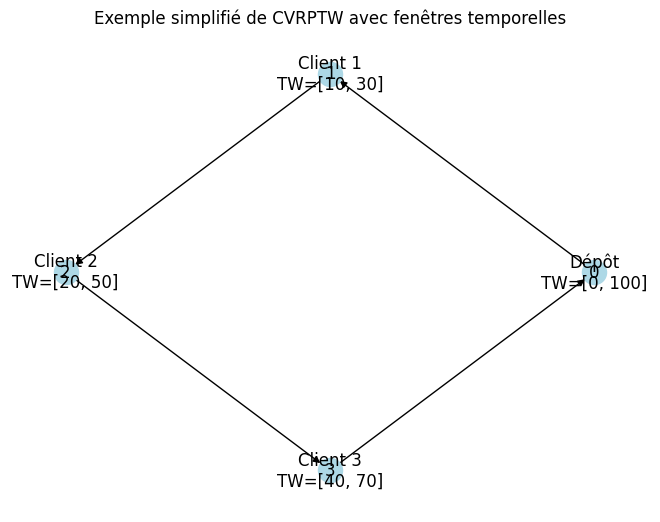

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
nodes = {
    0: {"label": "Dépôt", "tw": "[0, 100]"},
    1: {"label": "Client 1", "tw": "[10, 30]"},
    2: {"label": "Client 2", "tw": "[20, 50]"},
    3: {"label": "Client 3", "tw": "[40, 70]"}
}
edges = [(0,1),(1,2),(2,3),(3,0)]
G.add_edges_from(edges)

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue')
labels = {i: f"{data['label']}\nTW={data['tw']}" for i,data in nodes.items()}
nx.draw_networkx_labels(G, pos, labels)
plt.title("Exemple simplifié de CVRPTW avec fenêtres temporelles")
plt.show()
